## Begining with the code analysis at first


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="plotly")

Here the AQI is calcualted by taking the maxium of the calculated value throudh pm2.5 particles and pm10 particles.
Then the time series plot is calculated for the various year with the marking of the moderate and unhealthy air quality
over the years. 

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def plot_aqi_time_series(data, year):
    """
    Plot the AQI time series with horizontal lines for AQI thresholds.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the AQI data with 'date', 'pm25', and 'pm10' columns
    year (int or str): The year being plotted (used in title)
    """
    # Create the time series plot
    fig = go.Figure()
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Calculate AQI as the maximum of pm2.5 and pm10 for each point
    aqi_values = data[['pm25', 'pm10']].max(axis=1)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=aqi_values,
        mode='lines',
        line=dict(color='royalblue', width=2),
        name='AQI Time Series'
    ))

    # Add horizontal lines for AQI thresholds
    fig.add_shape(
        type="line",
        x0=data['Date'].min(),
        x1=data['Date'].max(),
        y0=51,
        y1=51,
        line=dict(color="orange", width=1, dash="dash"),
    )
    fig.add_shape(
        type="line",
        x0=data['Date'].min(),
        x1=data['Date'].max(),
        y0=150,
        y1=150,
        line=dict(color="red", width=1, dash="dash"),
    )

    # Add dummy traces for the legend
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color="orange", width=1, dash="dash"),
        name="moderate (AQI > 50)"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color="red", width=1, dash="dash"),
        name="Unhealthy (AQI > 150)"
    ))

    # Update layout
    fig.update_layout(
        title=f'AQI Time Series for {year}',
        xaxis_title='Date',
        yaxis_title='AQI',
        template='plotly_white',
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="right",
            x=1.2
        )
    )

    fig.show()
    fig.write_html(f"../results/plotly_html_output/Aqi_time_{year}.html")
    return fig



In [ ]:
# First read the CSV file into a DataFrame
data_2019 = pd.read_csv('../data/year_2019/Kathmandu_2019.csv')

# Then pass the DataFrame to the function
aqi_2021 = plot_aqi_time_series(data_2019, '2019')

In [ ]:
# First read the CSV file into a DataFrame
data_2020 = pd.read_csv('../data/year_2020/Kathmandu_2020.csv')

# Then pass the DataFrame to the function
aqi_2021 = plot_aqi_time_series(data_2020, '2020')

In [ ]:
# First read the CSV file into a DataFrame
data_2021 = pd.read_csv('../data/year_2020/Kathmandu_2021.csv')

# Then pass the DataFrame to the function
aqi_2021 = plot_aqi_time_series(data_2021, '2021')

In [ ]:
data_2022 = pd.read_csv('../data/year_2020/Kathmandu_2022.csv')

# Then pass the DataFrame to the function
aqi_2022 = plot_aqi_time_series(data_2022, '2022')

In [ ]:
data_2023 = pd.read_csv('../data/year_2020/Kathmandu_2023.csv')

# Then pass the DataFrame to the function
aqi_2023 = plot_aqi_time_series(data_2023, '2023')

In [ ]:
data_2024 = pd.read_csv('../data/year_2020/Kathmandu_2024_2025.csv')

# Then pass the DataFrame to the function
aqi_2024 = plot_aqi_time_series(data_2024, '2024-2025')

Now to find the time when the is much higher in the certain year

Here the fire count of each days , the average of the frp of the each days is calculated and the different dataframes are calulated for each years.

In [28]:
def load_fire_data(path):
    df = pd.read_csv(path)

    # Convert date column
    df["acq_date"] = pd.to_datetime(df["acq_date"])

    # Group by date and aggregate
    daily_stats = df.groupby("acq_date").agg(
        fire_count=("frp", "count"),
        total_frp=("frp", "sum"),
        avg_frp=("frp", "mean")
    ).reset_index()
    return daily_stats


In [ ]:
fire_data_2019=load_fire_data('../data/fire_dataset/modis_2019_Nepal.csv')
fire_data_2020=load_fire_data('../data/fire_dataset/modis_2020_Nepal.csv')
fire_data_2021=load_fire_data('../data/fire_dataset/modis_2021_Nepal.csv')
fire_data_2022=load_fire_data('../data/fire_dataset/modis_2022_Nepal.csv')
fire_data_2023=load_fire_data('../data/fire_dataset/modis_2023_Nepal.csv')


Data for the aqi and the forest fire are accumulated into one 

In [30]:
def data_merging(data, fire_data):
    # Ensure dates are in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])
    
    # Calculate AQI (max of PM2.5 and PM10)
    data['aqi'] = data[['pm25', 'pm10']].max(axis=1)
    
    # Left merge to keep all AQI dates
    combined_data_df = pd.merge(
        data[['Date', 'aqi']],
        fire_data[['acq_date', 'fire_count', 'avg_frp']],
        left_on='Date',
        right_on='acq_date',
        how='left'
    )
    
    # Fill missing fire data with 0
    combined_data_df['fire_count'] = combined_data_df['fire_count'].fillna(0)
    combined_data_df['avg_frp'] = combined_data_df['avg_frp'].fillna(0)
    
    # Drop redundant column and rename for consistency
    combined_data_df = combined_data_df.drop(columns=['acq_date'])
    combined_data_df = combined_data_df.rename(columns={'Date': 'date'})
    
    return combined_data_df
merged_data_2019=data_merging(data_2019,fire_data_2019)
merged_data_2020=data_merging(data_2020,fire_data_2020)
merged_data_2021 = data_merging(data_2021, fire_data_2021)
merged_data_2022 = data_merging(data_2022, fire_data_2022)
merged_data_2023 = data_merging(data_2023, fire_data_2023)
            

The scatter plot is made with the aqi and the fire count then the frp is also used to propely asses the pollution as the high frp has the high aqi although being less fire count

In [ ]:
def scatter_plot_aqi_forest_fire(data,year):
    fig = px.scatter(
        data,
        x='aqi',
        y='fire_count',
        color='avg_frp',             # FRP as color (legend)
        hover_name='date',       # Date on hover
        color_continuous_scale='OrRd',
        labels={
            'aqi': 'Air Quality Index (AQI)',
            'fire_count': 'Fire Count',
            'avg_frp': 'FRP'
        },
        title=f'Fire Count vs AQI {year}',
        template='plotly_white'
    )

    fig.update_traces(marker=dict(line=dict(width=1, color='black'), opacity=0.7))
    fig.update_layout(legend_title='FRP')

    fig.write_html(f'../results/plotly_html_output/Forest_aqi_{year}.html')
    fig.show()
scatter_plot_aqi_forest_fire(merged_data_2019,2019)
scatter_plot_aqi_forest_fire(merged_data_2020,2020)
scatter_plot_aqi_forest_fire(merged_data_2021,2021)
scatter_plot_aqi_forest_fire(merged_data_2022,2022)
scatter_plot_aqi_forest_fire(merged_data_2023,2023)

In [32]:
def load_and_prepare_dataset(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.strftime('%B')
    return df


In [33]:
def combine_datasets(dfs):
    combined_df = pd.concat(dfs, ignore_index=True)
    return load_and_prepare_dataset(combined_df)


In [ ]:
def analyze_peak_months_horizontal_barplot(df):
    grouped = df.groupby(['year', 'month_name']).agg({
        'aqi': 'mean',
        'fire_count': 'sum'
    }).reset_index()

    peak_months = grouped.loc[grouped.groupby('year')['aqi'].idxmax()].reset_index(drop=True)
    
    # Filter out year 2018
    peak_months = peak_months[peak_months['year'] != 2018]
    
    peak_months['label'] = peak_months['month_name'] + " (" + peak_months['year'].astype(str) + ")"

    fig = go.Figure()

    fig.add_trace(go.Bar(
        y=peak_months['label'],
        x=peak_months['aqi'],
        name='Avg AQI',
        orientation='h',
        marker_color='darkorange',
        text=peak_months['fire_count'].round(1).astype(str),  # fire count as text
        textposition='outside',  # places text to the right of the bar
        hovertemplate='<b>%{y}</b><br>AQI: %{x}<br>Fire Count: %{text}<extra></extra>'
    ))

    fig.update_layout(
        title='Yearly Peak AQI Months with Fire Count Overlay ',
        xaxis_title='Average AQI',
        yaxis_title='Year (Peak Month)',
        template='plotly_white',
        showlegend=False
    )

    fig.write_html('../results/plotly_html_output/Bar_plot_of_each_year_highest.html')
    fig.show()

In [35]:
processed_dfs=[load_and_prepare_dataset(df) for df in [merged_data_2019,merged_data_2020,merged_data_2021,merged_data_2022,merged_data_2023]]
combined_dfs=combine_datasets(processed_dfs)
analyze_peak_months_horizontal_barplot(combined_dfs)

In [ ]:
def analyze_peak_months_horizontal_barplot_frp(df):
    grouped = df.groupby(['year', 'month_name']).agg({
        'aqi': 'mean',
        'avg_frp': 'sum'
    }).reset_index()

    peak_months = grouped.loc[grouped.groupby('year')['aqi'].idxmax()].reset_index(drop=True)
    peak_months = peak_months[peak_months['year'] != 2018]
    peak_months['label'] = peak_months['month_name'] + " (" + peak_months['year'].astype(str) + ")"

    fig = go.Figure()

    fig.add_trace(go.Bar(
        y=peak_months['label'],
        x=peak_months['aqi'],
        name='Avg AQI',
        orientation='h',
        marker_color='darkorange',
        text=peak_months['avg_frp'].round(1).astype(str),  # Use avg_frp as text
        textposition='outside',  # Show text at the end of the bar
        hovertemplate='<b>%{y}</b><br>AQI: %{x}<br>Avg FRP: %{text}<extra></extra>'
    ))

    fig.update_layout(
        title='Yearly Peak AQI Months with Avg FRP Overlay',
        xaxis_title='Average AQI',
        yaxis_title='Year (Peak Month)',
        template='plotly_white',
        showlegend=False  # no need for legend since we have only one trace now
    )
    # saving the figure as HTML
    fig.write_html('../results/plotly_html_output/Bar_plot_of_each_year_highest_frp.html')
    
    fig.show()
analyze_peak_months_horizontal_barplot_frp(combined_dfs)

In [ ]:
def plot_aqi_time_series(data, year):
    fig = go.Figure()
    data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is datetime

    # AQI line plot
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data['aqi'],
        mode='lines',
        name='AQI',
        line=dict(color='royalblue', width=2),
        yaxis='y1'
    ))

    # Fire Count line plot (secondary axis)
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data['fire_count'],
        mode='lines',
        name='Fire Count',
        line=dict(color='firebrick', width=2, dash='dot'),
        yaxis='y2'
    ))

    # Add monsoon period vertical lines (June 15 - Sept 15)
    fig.add_shape(
        type='line',
        x0=f'{year}-06-15', x1=f'{year}-06-15',
        y0=0, y1=data['aqi'].max(),
        line=dict(color='green', width=2, dash='dash'),
        name='Monsoon Start'
    )
    fig.add_shape(
        type='line',
        x0=f'{year}-09-15', x1=f'{year}-09-15',
        y0=0, y1=data['aqi'].max(),
        line=dict(color='green', width=2, dash='dash'),
        name='Monsoon End'
    )

    # Shade the monsoon period for better visibility
    fig.add_vrect(
        x0=f'{year}-06-15', x1=f'{year}-09-15',
        fillcolor="lightgreen", opacity=0.2,
        layer="below", line_width=0,
        annotation_text="Monsoon Period", annotation_position="top left"
    )

    # Dummy traces for legend (monsoon and AQI thresholds)
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='green', width=2, dash='dash'),
        name='Monsoon Period (Jun 15 - Sep 15)'
    ))
    # Layout with secondary y-axis
    fig.update_layout(
        title=f"AQI and Fire Count Time Series for {year}",
        xaxis_title="Date",
        yaxis=dict(title="AQI", side='left', showgrid=False),
        yaxis2=dict(title="Fire Count", overlaying='y', side='right', showgrid=False),
        legend=dict(x=1.05, y=1),
        template="plotly_white",
        margin=dict(r=100)
    )

    fig.show()
    fig.write_html(f"../results/plotly_html_output/aqi_and_fire_time_series_{year}.html")

In [38]:
plot_aqi_time_series(merged_data_2019,2019)
plot_aqi_time_series(merged_data_2020,2020)
plot_aqi_time_series(merged_data_2021,2021)
plot_aqi_time_series(merged_data_2022,2022)
plot_aqi_time_series(merged_data_2023,2023)

In [ ]:
average_data_excluding_top_fire_months = []

def averaging_year_excluding_top_fire_months(data, fire_data, n_months_to_exclude=2):
    fire_data['month'] = fire_data['acq_date'].dt.month
    monthly_fire_counts = fire_data['month'].value_counts()
    top_fire_months = monthly_fire_counts.nlargest(n_months_to_exclude).index.tolist()
    filtered_data = data[~data['Date'].dt.month.isin(top_fire_months)]
    average = filtered_data[['pm25', 'pm10']].max(axis=1).mean()
    average_data_excluding_top_fire_months.append(average)

averaging_year_excluding_top_fire_months(data_2019, fire_data_2019, n_months_to_exclude=2)
averaging_year_excluding_top_fire_months(data_2020, fire_data_2020, n_months_to_exclude=2)
averaging_year_excluding_top_fire_months(data_2021, fire_data_2021, n_months_to_exclude=2)
averaging_year_excluding_top_fire_months(data_2022, fire_data_2022, n_months_to_exclude=2)
averaging_year_excluding_top_fire_months(data_2023, fire_data_2023, n_months_to_exclude=2)

average_data_excluding_top_fire_months


[np.float64(93.4336569579288),
 np.float64(85.57980456026058),
 np.float64(92.44771241830065),
 np.float64(86.4530612244898),
 np.float64(109.59360730593608)]

C:\Users\Acer\AppData\Local\Temp\ipykernel_15236\2536906066.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




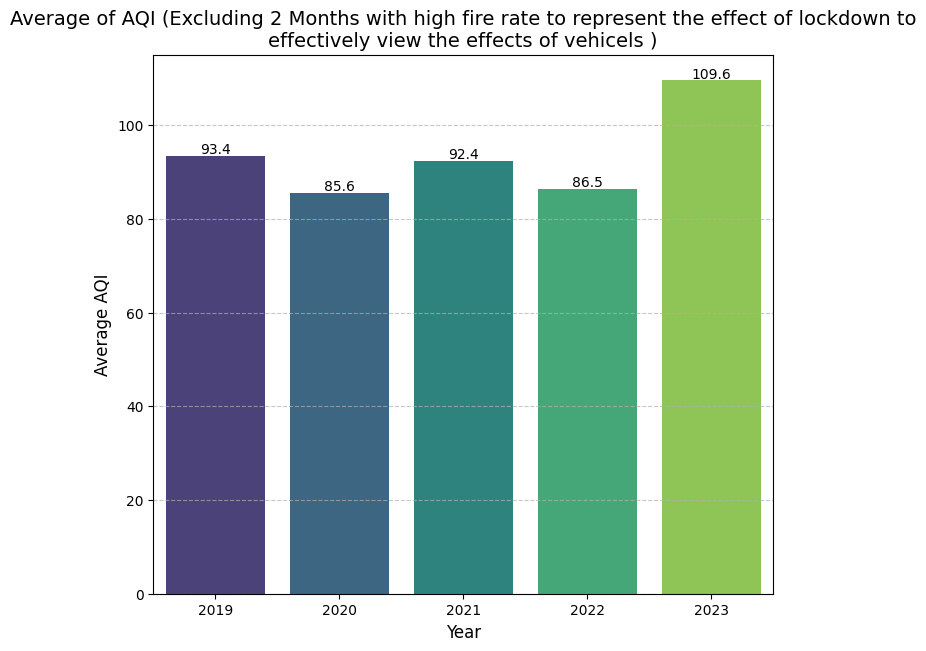

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
years = [2019, 2020, 2021, 2022, 2023]
sns.barplot(x=years, y=average_data_excluding_top_fire_months, palette="viridis")

# Customize the plot
plt.title("Average of AQI (Excluding 2 Months with high fire rate to represent the effect of lockdown to\neffectively view the effects of vehicels )", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average AQI", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(average_data_excluding_top_fire_months):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=10)
    
# save the figure as HTML

plt.show()
